In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [3]:
# import pca 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = pd.read_csv('dataset1/fraud_oracle.csv')
df2 = pd.read_csv('dataset2/car_insurance_claim.csv')
df3 = pd.read_csv('dataset4/insurance_claims.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder

discrete_columns = []
columns1 = df1.columns
for col in columns1:
    if df1[col].dtypes == 'object':
        discrete_columns.append(col)

for col in discrete_columns:
    enc = LabelEncoder()
    values = df1[col].unique()
    enc_fit = enc.fit(values)
    df1[col] = enc_fit.transform(df1[col])

y1 = df1['FraudFound_P']
X1 = df1.drop(['FraudFound_P'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

X1 = pd.DataFrame(scaler1.fit_transform(X1), columns=X1.columns)
X1.head()

from sklearn.decomposition import PCA

pca1 = PCA(n_components=2, random_state=42)
data1 = X1.values
pca_data1 = pca1.fit_transform(data1)

In [5]:
cols = ['INCOME', 'HOME_VAL', 'OLDCLAIM', 'CLM_AMT', 'BLUEBOOK']

for col in cols:
        df2[col] = df2[col].str.replace(',', '').str.replace('$', '').astype('float')

for col in df2.columns:
    if(df2[col].dtype == "object"):
        df2[col] = df2[col].str.replace('z_', '')


from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
encoder = LabelEncoder()

X2 = df2.drop(['CLAIM_FLAG', 'ID', 'BIRTH', 'CLM_AMT', 'OLDCLAIM'], axis=1)
y2 = df2['CLAIM_FLAG']


# 1. changing X_train and X_test to dataframes to find mean and modes
X2 = pd.DataFrame(X2, columns=df2.columns)

# 2. imputing the data - filling in missing values
X2.fillna(X2.mode().iloc[0], inplace=True)

# 3. dropping target feature
X2.drop(['ID', 'CLAIM_FLAG', 'BIRTH', 'CLM_AMT', 'OLDCLAIM'], axis=1, inplace=True)


# 4. Scaling the numerical features
numeric_features = []

for col in X2.columns:
    if(X2[col].dtype == "float" or X2[col].dtype == "int"):
        numeric_features.append(col)

X2[numeric_features] = scaler.fit_transform(X2[numeric_features])

# 5. Encoding the categorical features
categorical_features = X2.select_dtypes(include=['object']).columns

for col in categorical_features:
    X2[col] = encoder.fit_transform(X2[col])


from sklearn.decomposition import PCA

pca2 = PCA(n_components=2, random_state=42)
data2 = X2.values
pca_data2 = pca2.fit_transform(data2)

In [6]:
df3.replace('?', np.nan, inplace = True)

df3['collision_type'] = df3['collision_type'].fillna(df3['collision_type'].mode()[0])

df3['property_damage'] = df3['property_damage'].fillna(df3['property_damage'].mode()[0])

df3['police_report_available'] = df3['police_report_available'].fillna(df3['police_report_available'].mode()[0])

df3['authorities_contacted'] = df3['authorities_contacted'].fillna(df3['authorities_contacted'].mode()[0])

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df3.drop(to_drop, inplace = True, axis = 1)

df3.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

# separating the feature and target columns

X3 = df3.drop('fraud_reported', axis = 1)
y3 = df3['fraud_reported'].replace({'Y': 1, 'N': 0})

# extracting categorical columns
cat_df = X3.select_dtypes(include = ['object'])

cat_df = pd.get_dummies(cat_df, drop_first = True)

# extracting the numerical columns

num_df = X3.select_dtypes(include = ['int64'])

# combining the Numerical and Categorical dataframes to get the final dataset

X3 = pd.concat([num_df, cat_df], axis = 1)


# replace True and False to 0 and 1 for all columns

X3 = X3.replace({True: 1, False: 0})

num_df = X3[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]


# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X3[num_df.columns] = scaler.fit_transform(X3[num_df.columns])


data = X3.values

from sklearn.decomposition import PCA

pca3 = PCA(n_components=2, random_state=42)
data3 = X3.values
pca_data3 = pca3.fit_transform(data3)


/tmp/ipykernel_5490/3842032013.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y3 = df3['fraud_reported'].replace({'Y': 1, 'N': 0})
/tmp/ipykernel_5490/3842032013.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X3 = X3.replace({True: 1, False: 0})


Text(0.5, 1.0, 'Vehicle Insurance Claim Fraud Detection')

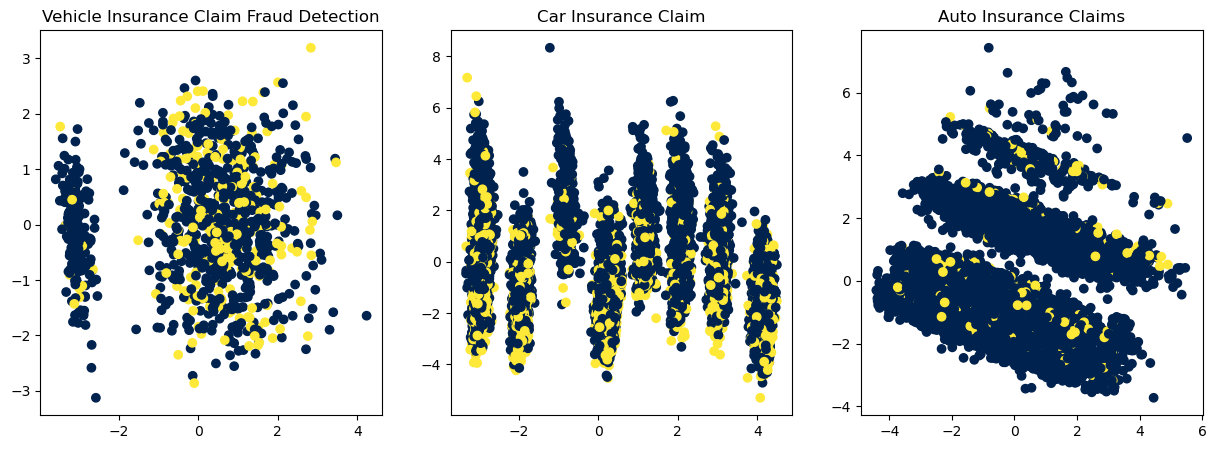

In [7]:
# plot 3 datasets in subplots using tight layout use another cmap 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[2].scatter(pca_data1[:, 0], pca_data1[:, 1], c=y1, cmap='cividis')
axs[2].set_title('Auto Insurance Claims')


axs[1].scatter(pca_data2[:, 0], pca_data2[:, 1], c=y2, cmap='cividis')
axs[1].set_title('Car Insurance Claim')

axs[0].scatter(pca_data3[:, 0], pca_data3[:, 1], c=y3, cmap='cividis')
axs[0].set_title('Vehicle Insurance Claim Fraud Detection')

In [8]:
def euclidean_distance(X, Y):
    return np.sqrt(np.sum(np.power(X - Y, 2), axis=1))

def cluster_data(solution, solution_idx):
    global num_cluster, data
    feature_vector_length = data.shape[1]
    cluster_centers = []
    all_clusters_dists = []
    clusters = []
    clusters_sum_dist = []
    
    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = euclidean_distance(data, cluster_centers[clust_idx])
        all_clusters_dists.append(np.array(cluster_center_dists))

    cluster_centers = np.array(cluster_centers)
    all_clusters_dists = np.array(all_clusters_dists)

    cluster_indices = np.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(np.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(np.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))

    clusters_sum_dist = np.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist

def fitness_func(instance, solution, solution_idx):
    _, _, _, _, clusters_sum_dist = cluster_data(solution, solution_idx)

    fitness = 1.0 / (np.sum(clusters_sum_dist) + 0.00000001)

    return fitness

class GeneticAlgorithm:
    
    def __init__(self, number_of_generations, population_size, number_of_genes, mutation_percent, fitness_func, genes_range, KMeans_ranges, seed):
        self.number_of_generations = number_of_generations
        self.population_size = population_size
        self.number_of_genes = number_of_genes
        self.mutation_percent = mutation_percent
        self.fitness_func = fitness_func
        self.genes_range = genes_range
        self.best_solution = None
        self.seed = seed
        self.KMeans_ranges = KMeans_ranges

        self.choromosomes = np.zeros((self.population_size + 6, self.number_of_genes))
        self.fitness = np.zeros((self.population_size + 6, 1))

    def population(self):
        for i in range(5):
            new_choromosome = []
            for j in range(self.number_of_genes):
                np.random.seed(i+j)
                new_choromosome.append(np.random.uniform(self.KMeans_ranges[j][0], self.KMeans_ranges[j][1]))
            self.choromosomes[i] = new_choromosome
            self.fitness[i] = self.fitness_func("", self.choromosomes[i], i)

        for i in range(5, self.population_size):
            new_choromosome = []
            for j in range(self.number_of_genes):
                np.random.seed(i+j)
                new_choromosome.append(np.random.uniform(self.genes_range[j][0], self.genes_range[j][1]))
            self.choromosomes[i] = new_choromosome
            self.fitness[i] = self.fitness_func("", self.choromosomes[i], i)

    def selection(self):

        # get index of fittest and second fittest choromosomes

        fittest_index = np.argmax(self.fitness)
        second_fittest_index = np.argmax(np.delete(self.fitness, fittest_index, axis=0))

        # Store the fittest and second fittest chromosomes
        parent_1 = self.choromosomes[fittest_index]
        parent_2 = self.choromosomes[second_fittest_index]
        
        # get random choromosomes and store it in parent_3
        np.random.seed(self.seed)
        self.seed += 1
        parent_3 = self.choromosomes[np.random.randint(0, self.population_size)]

        return parent_1, parent_2, parent_3

    def crossover(self, parent_1, parent_2, parent_3):
        
        # create new choromosome by crossover between parent_1, parent_2 and parent_3
        # randomly select genes from parent_1, parent_2 and parent_3
        new_choromosome = []
        for i in range(self.number_of_genes):
            np.random.seed(self.seed)
            self.seed += 1
            chance = np.random.randint(0, 100)
            if chance <= 50: 
                new_choromosome.append(parent_1[i])
            elif chance <= 88:
                new_choromosome.append(parent_2[i])
            else:
                new_choromosome.append(parent_3[i])

        return new_choromosome


    def mutation(self, new_choromosome):

        new_chromosome_mutation1 = new_choromosome.copy()
        # mutate new choromosome by randomly changing genes
        np.random.seed(self.seed)
        self.seed += 1
        chance = np.random.randint(0, 100)
        # if chance <= 50:
        for i in range(self.number_of_genes):
            np.random.seed(self.seed)
            self.seed += 1
            chance = np.random.randint(0, 100)

            if chance <= self.mutation_percent:
                np.random.seed(self.seed)
                self.seed += 1
                new_chromosome_mutation1[i] = np.random.uniform(self.genes_range[i][0], self.genes_range[i][1])

        new_chromosome_mutation2 = new_choromosome.copy()
        np.random.seed(self.seed + 1)
        self.seed += 1
        pos1 = np.random.randint(0, self.number_of_genes)

        pos2 = (pos1 + count_of_features) % self.number_of_genes

        new_chromosome_mutation2[pos1], new_chromosome_mutation2[pos2] = new_chromosome_mutation2[pos2], new_chromosome_mutation2[pos1]

        fitness1 = self.fitness_func("", new_chromosome_mutation1, 1)
        fitness2 = self.fitness_func("", new_chromosome_mutation2, 1)

        if fitness1 > fitness2:
            new_choromosome = new_chromosome_mutation1
        else:
            new_choromosome = new_chromosome_mutation2

        return new_choromosome

    def survival(self, new_choromosome, new_choromosome_fitness):
        # replace the least fittest choromosome with the new one
        # get index of least fittest choromosome
        least_fittest_idx = np.argmin(self.fitness)
        # replace the least fittest choromosome with the new one
        self.choromosomes[least_fittest_idx] = new_choromosome
        self.fitness[least_fittest_idx] = new_choromosome_fitness

    def best_solution(self):
        return self.best_solution

    def run(self):
        self.population()
        for i in range(self.population_size, self.population_size + self.number_of_generations):
            parent_1, parent_2, parent_3 = self.selection()
            new_choromosome = self.crossover(parent_1, parent_2, parent_3)
            np.random.seed(i)
            if np.random.randint(0, 100) <= self.mutation_percent:
                new_choromosome = self.mutation(new_choromosome)
            new_choromosome_fitness = self.fitness_func("", new_choromosome, i)
            self.survival(new_choromosome, new_choromosome_fitness)

        self.best_solution = self.choromosomes[np.argmax(self.fitness)]        

In [9]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=2, random_state=42)
kmeans1.fit(X1)

KMeans(n_clusters=2, random_state=42)

In [146]:
num_clusters = 2

count_of_features = X1.columns.shape[0]
genes_ranges = []
KMeans_ranges = []

for i in range(num_clusters):
    for j in range(count_of_features):
        pivot = kmeans1.cluster_centers_[i][j]
        start = -3 * pivot
        end = 3 * pivot
        
        KMeans_ranges.append([start, end])
        genes_ranges.append([X1.iloc[:, j].min(), X1.iloc[:, j].max()])        

ga1 = GeneticAlgorithm(
    KMeans_ranges=KMeans_ranges,
    number_of_generations=2000,
    population_size=100,
    number_of_genes=count_of_features*num_clusters,
    mutation_percent=40,
    fitness_func=fitness_func,
    genes_range=genes_ranges,
    seed = 42

)

data = data1.copy()

In [147]:
ga1.run()

cluster_centers1, all_clusters_dists1, cluster_indices1, clusters1, clusters_sum_dist1 = cluster_data(ga1.best_solution, 0)

In [10]:
dic1 = {
    0: 0,
    1: 1
}

dic2 = {
    0: 1,
    1: 0
}

In [298]:
yy_pred = pd.Series(cluster_indices1).map(dic1)

from sklearn.metrics import classification_report

print(classification_report(y1, yy_pred))

              precision    recall  f1-score   support

           0       0.94      0.51      0.66     14497
           1       0.06      0.51      0.11       923

    accuracy                           0.51     15420
   macro avg       0.50      0.51      0.39     15420
weighted avg       0.89      0.51      0.63     15420



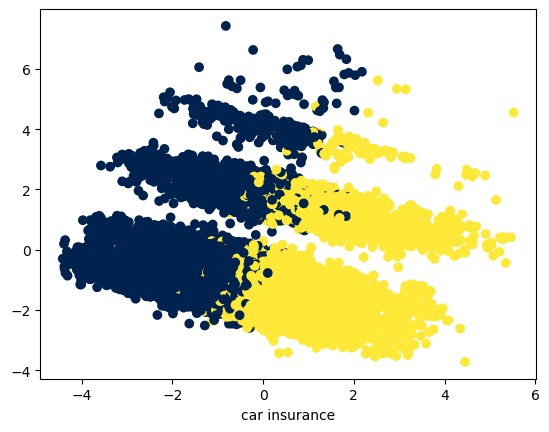

In [299]:
plt.scatter(pca_data1[:, 0], pca_data1[:, 1], c=cluster_indices1, cmap='cividis')
plt.xlabel('car insurance')
plt.show()

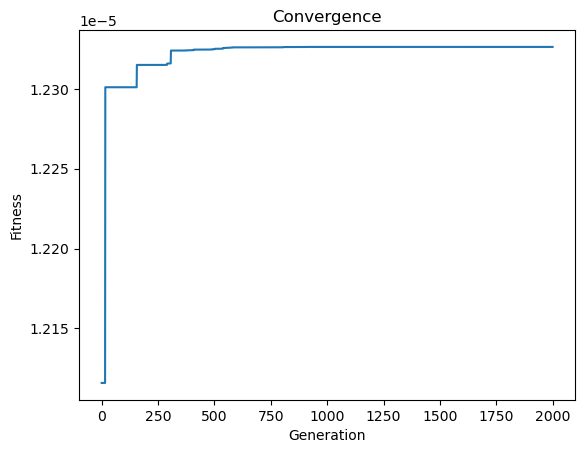

In [155]:
# plot convergence

plt.plot(ga1.convergence)
plt.title('Convergence')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [11]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(X2)

KMeans(n_clusters=2, random_state=42)

In [157]:
num_clusters = 2

count_of_features = X2.columns.shape[0]
genes_ranges = []
KMeans_ranges = []

for i in range(num_clusters):
    for j in range(count_of_features):
        pivot = kmeans2.cluster_centers_[i][j]
        start = -3 * pivot
        end = 3*pivot
        
        KMeans_ranges.append([start, end])
        genes_ranges.append([X2.iloc[:, j].min(), X2.iloc[:, j].max()])        

ga2 = GeneticAlgorithm(
    KMeans_ranges=KMeans_ranges,
    number_of_generations=1500,
    population_size=100,
    number_of_genes=count_of_features*num_clusters,
    mutation_percent=20,
    fitness_func=fitness_func,
    genes_range=genes_ranges,
    seed=42
)

In [158]:
data = data2.copy()

In [159]:
ga2.run()
cluster_centers2, all_clusters_dists2, cluster_indices2, clusters2, clusters_sum_dist2 = cluster_data(ga2.best_solution, 0)

In [300]:
yy_pred = pd.Series(cluster_indices2).map(dic2)

print(classification_report(y2, yy_pred))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      7556
           1       0.32      0.57      0.41      2746

    accuracy                           0.56     10302
   macro avg       0.55      0.56      0.53     10302
weighted avg       0.66      0.56      0.59     10302



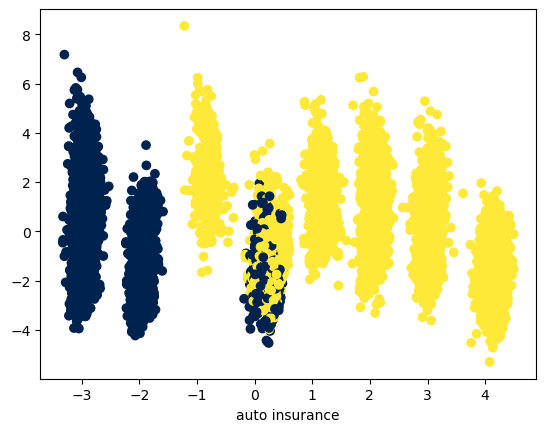

In [301]:
plt.scatter(pca_data2[:, 0], pca_data2[:, 1], c=cluster_indices2, cmap='cividis')
plt.xlabel('auto insurance')
plt.show()


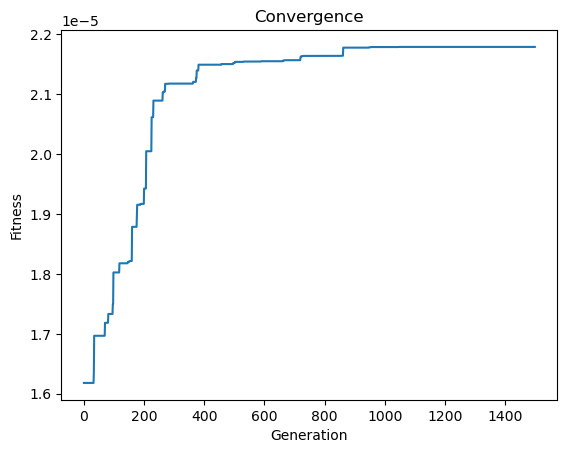

In [163]:
# plot convergence

plt.plot(ga2.convergence)
plt.title('Convergence')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [12]:
kmeans3 = KMeans(n_clusters=2, random_state=42)
kmeans3.fit(X3)

KMeans(n_clusters=2, random_state=42)

In [287]:
num_clusters = 2

count_of_features = X3.columns.shape[0]
genes_ranges = []
KMeans_ranges = []

for i in range(num_clusters):
    for j in range(count_of_features):
        pivot = kmeans3.cluster_centers_[i][j]
        start = -2 * pivot
        end = 2*pivot
        
        KMeans_ranges.append([start, end])
        genes_ranges.append([X3.iloc[:, j].min(), X3.iloc[:, j].max()])        

ga3 = GeneticAlgorithm(
    KMeans_ranges=KMeans_ranges,
    number_of_generations=1500,
    population_size=100,
    number_of_genes=count_of_features*num_clusters,
    mutation_percent=20,
    fitness_func=fitness_func,
    genes_range=genes_ranges,
    seed=42
)

In [288]:
data = X3.values

In [289]:
ga3.run()

In [290]:
cluster_centers3, all_clusters_dists3, cluster_indices3, clusters3, clusters_sum_dist3 = cluster_data(ga3.best_solution, 0)

In [302]:
yy_pred = yy_pred = pd.Series(cluster_indices3).map(dic1)

print(classification_report(y3, yy_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       753
           1       0.31      0.15      0.20       247

    accuracy                           0.70      1000
   macro avg       0.53      0.52      0.51      1000
weighted avg       0.65      0.70      0.67      1000



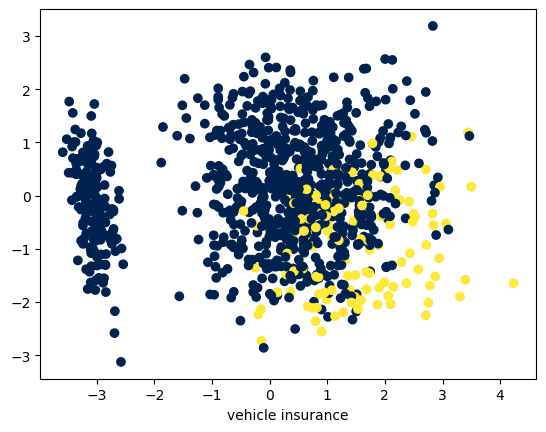

In [ ]:
plt.scatter(pca_data3[:, 0], pca_data3[:, 1], c=cluster_indices3, cmap='cividis')
plt.xlabel('vehicle insurance')
plt.show()


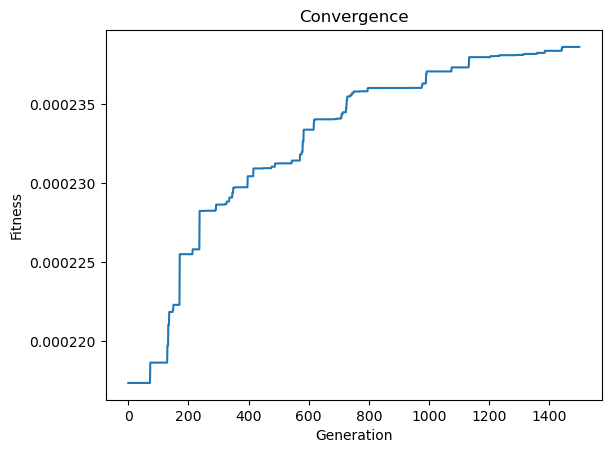

In [292]:
# plot convergence

plt.plot(ga3.convergence)
plt.title('Convergence')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()


In [77]:
from sklearn.cluster import AgglomerativeClustering

hc1 = AgglomerativeClustering(n_clusters=2).fit(X1)
hc2 = AgglomerativeClustering(n_clusters=2).fit(X2)
hc3 = AgglomerativeClustering(n_clusters=2).fit(X3)


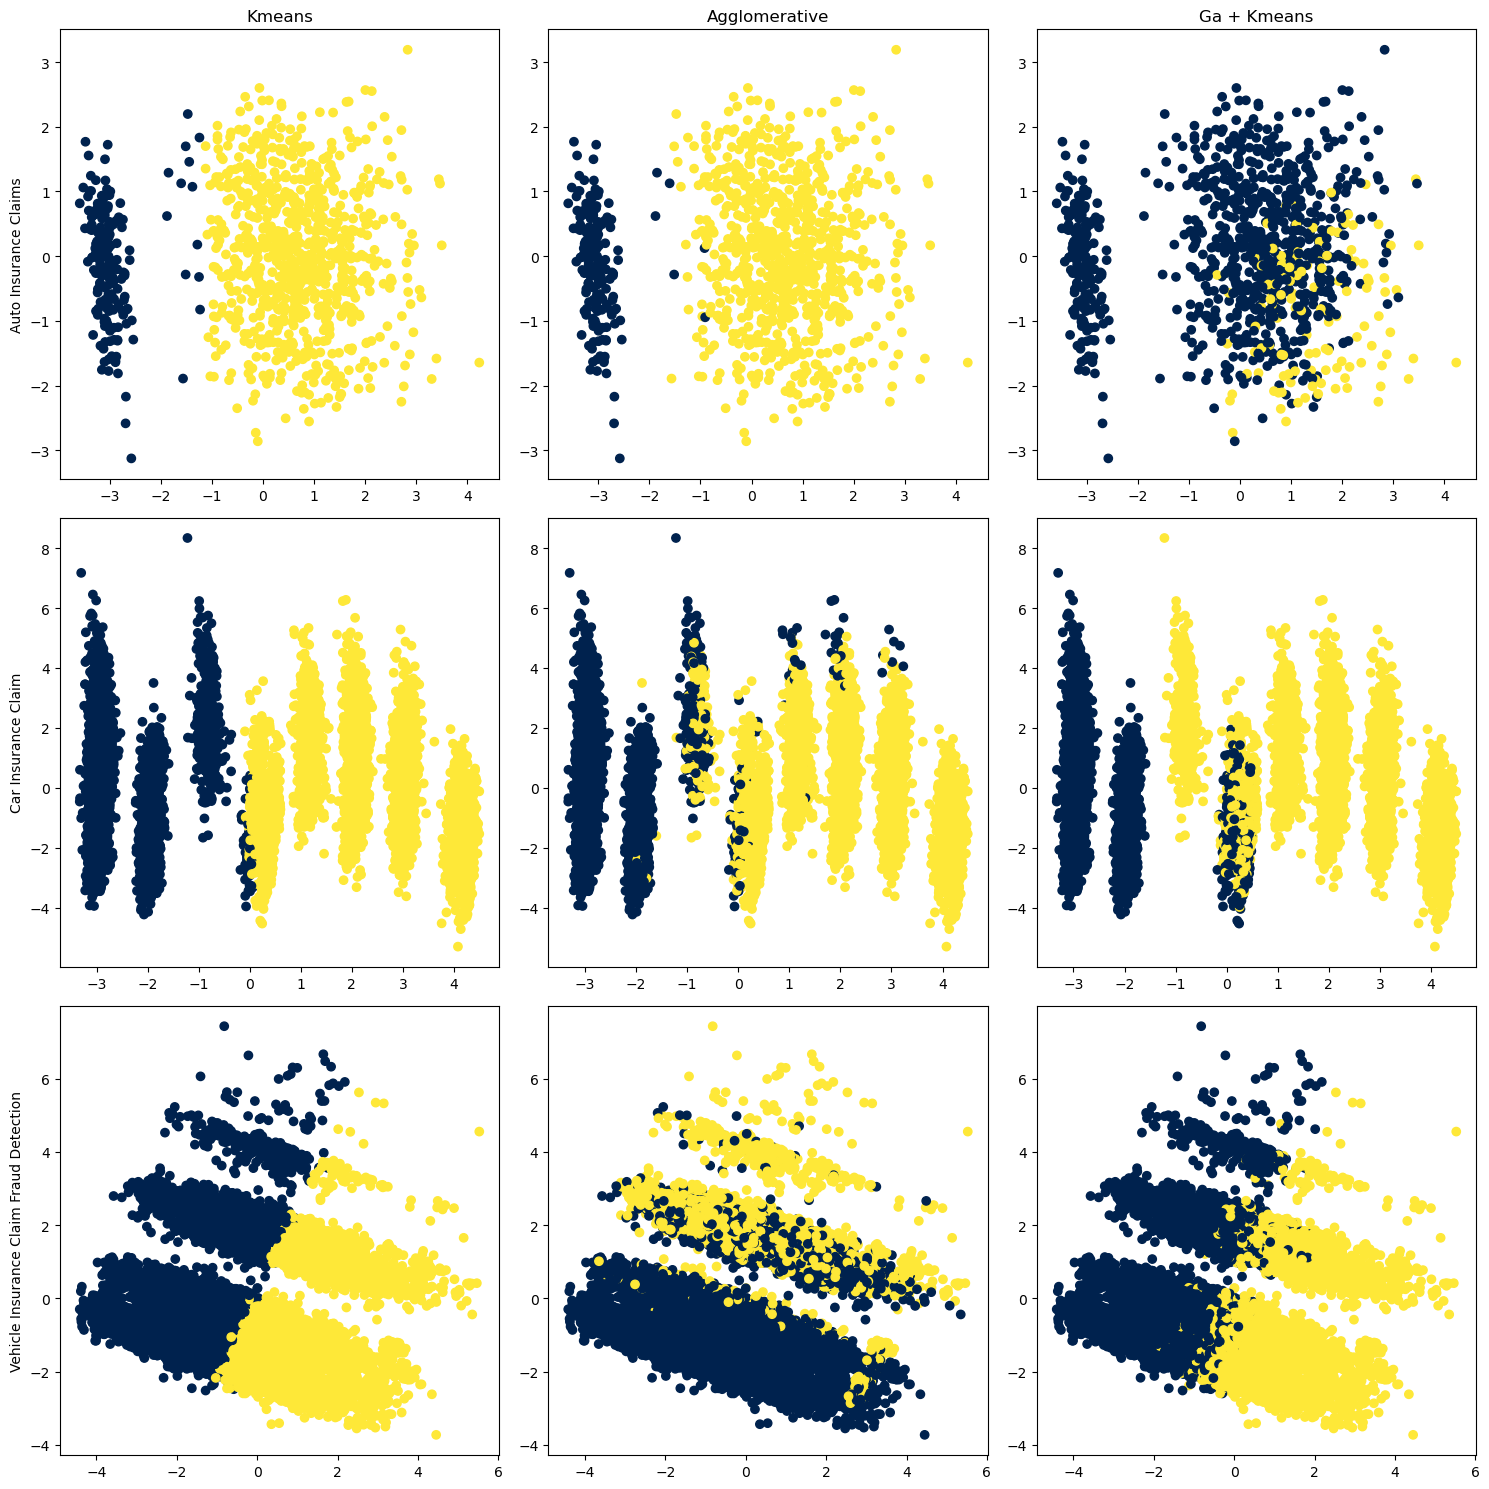

In [ ]:
# plot all 3 datasets clusterings using kmaens and agglomerative clustering and ga clustering

fig, axs = plt.subplots(3, 3, figsize=(15, 15))


kmeans1_labels = pd.Series(kmeans1.labels_).map(dic2)
hc1_labels = pd.Series(hc1.labels_).map(dic1)

kmeans3_labels = pd.Series(kmeans3.labels_).map(dic2)
hc3_labels = pd.Series(hc3.labels_).map(dic2)

axs[2, 0].scatter(pca_data1[:, 0], pca_data1[:, 1], c=kmeans1_labels, cmap='cividis')
axs[2, 0].set_ylabel('Vehicle Insurance Claim Fraud Detection')


axs[2, 1].scatter(pca_data1[:, 0], pca_data1[:, 1], c=hc1_labels, cmap='cividis')



axs[2, 2].scatter(pca_data1[:, 0], pca_data1[:, 1], c=cluster_indices1, cmap='cividis')



axs[1, 0].scatter(pca_data2[:, 0], pca_data2[:, 1], c=kmeans2.labels_, cmap='cividis')
axs[1, 0].set_ylabel('Car Insurance Claim')


# map the labels to 0 and 1 for hc2.labels_
hc2_labels = pd.Series(hc2.labels_).map(dic2)
axs[1, 1].scatter(pca_data2[:, 0], pca_data2[:, 1], c=hc2_labels, cmap='cividis')


axs[1, 2].scatter(pca_data2[:, 0], pca_data2[:, 1], c=cluster_indices2, cmap='cividis')


axs[0, 0].scatter(pca_data3[:, 0], pca_data3[:, 1], c=kmeans3_labels, cmap='cividis')
axs[0, 0].set_ylabel('Auto Insurance Claims')

axs[0, 0].set_title('Kmeans')

axs[0, 1].scatter(pca_data3[:, 0], pca_data3[:, 1], c=hc3_labels, cmap='cividis')
axs[0, 1].set_title('Agglomerative')

axs[0, 2].scatter(pca_data3[:, 0], pca_data3[:, 1], c=cluster_indices3, cmap='cividis')
axs[0, 2].set_title('Ga + Kmeans')

plt.tight_layout()

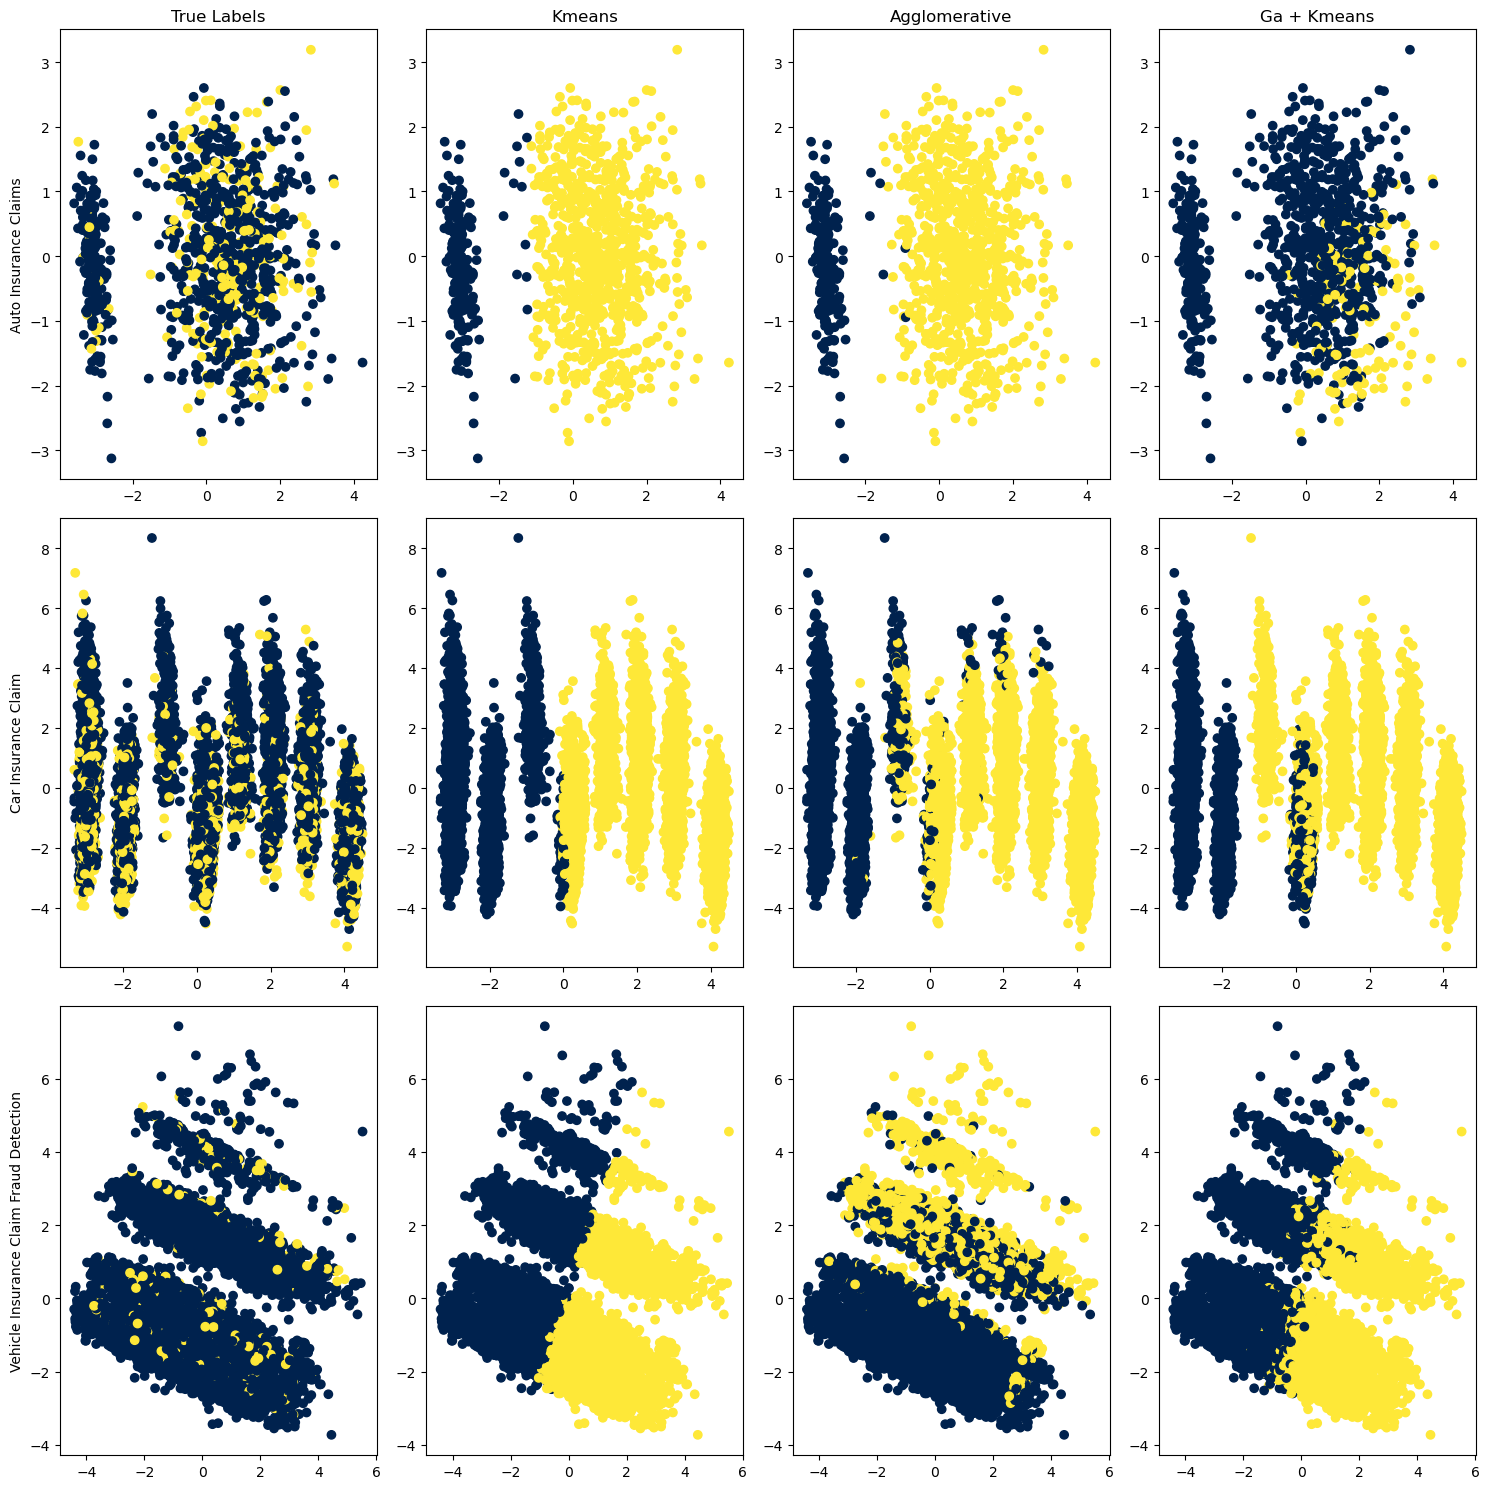

In [ ]:
# make 3 * 4 subplot for each dataset and each clustering algorithm

fig, axs = plt.subplots(3, 4, figsize=(15, 15))

axs[0, 0].scatter(pca_data3[:, 0], pca_data3[:, 1], c=y3, cmap='cividis')
axs[0, 0].set_ylabel('Auto Insurance Claims')
axs[0, 0].set_title('True Labels')

axs[0, 1].scatter(pca_data3[:, 0], pca_data3[:, 1], c=kmeans3_labels, cmap='cividis')
axs[0, 1].set_title('Kmeans')

axs[0, 2].scatter(pca_data3[:, 0], pca_data3[:, 1], c=hc3_labels, cmap='cividis')
axs[0, 2].set_title('Agglomerative')

axs[0, 3].scatter(pca_data3[:, 0], pca_data3[:, 1], c=cluster_indices3, cmap='cividis')
axs[0, 3].set_title('Ga + Kmeans')

axs[1, 0].scatter(pca_data2[:, 0], pca_data2[:, 1], c=y2, cmap='cividis')
axs[1, 0].set_ylabel('Car Insurance Claim')


axs[1, 1].scatter(pca_data2[:, 0], pca_data2[:, 1], c=kmeans2.labels_, cmap='cividis')


axs[1, 2].scatter(pca_data2[:, 0], pca_data2[:, 1], c=hc2_labels, cmap='cividis')


axs[1, 3].scatter(pca_data2[:, 0], pca_data2[:, 1], c=cluster_indices2, cmap='cividis')


axs[2, 0].scatter(pca_data1[:, 0], pca_data1[:, 1], c=y1, cmap='cividis')
axs[2, 0].set_ylabel('Vehicle Insurance Claim Fraud Detection')


axs[2, 1].scatter(pca_data1[:, 0], pca_data1[:, 1], c=kmeans1_labels, cmap='cividis')


axs[2, 2].scatter(pca_data1[:, 0], pca_data1[:, 1], c=hc1_labels, cmap='cividis')


axs[2, 3].scatter(pca_data1[:, 0], pca_data1[:, 1], c=cluster_indices1, cmap='cividis')

plt.tight_layout()

Text(0, 0.5, 'Best fitness score')

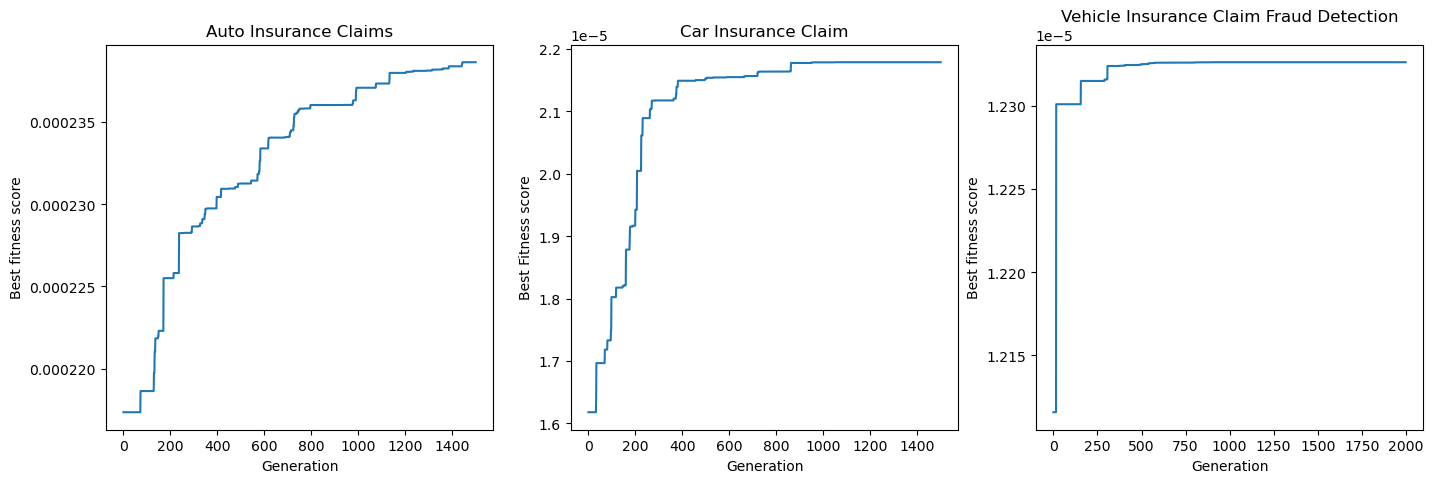

In [313]:
# subplot of convergence of 3 datasets

fig, axs = plt.subplots(1, 3, figsize=(17, 5))

axs[0].plot(ga3.convergence)
axs[0].set_title('Auto Insurance Claims')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Best fitness score')

axs[1].plot(ga2.convergence)
axs[1].set_title('Car Insurance Claim')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Best Fitness score')


axs[2].plot(ga1.convergence)
axs[2].set_title('Vehicle Insurance Claim Fraud Detection')
axs[2].set_xlabel('Generation')
axs[2].set_ylabel('Best fitness score')


In [75]:
kmeans1_labels = pd.Series(kmeans1.labels_).map(dic2)
kmeans2_labels = pd.Series(kmeans2.labels_).map(dic2)
kmeans3_labels = pd.Series(kmeans3.labels_).map(dic1)

In [78]:
hc1_labels = pd.Series(hc1.labels_).map(dic1)
hc2_labels = pd.Series(hc2.labels_).map(dic1)
hc3_labels = pd.Series(hc3.labels_).map(dic1)

In [91]:
class GeneticAlgorithm_classic:

    def __init__(self, number_of_generations, population_size, number_of_genes, mutation_percent, fitness_func, genes_range):
        self.number_of_generations = number_of_generations
        self.population_size = population_size
        self.number_of_genes = number_of_genes
        self.mutation_percent = mutation_percent
        self.fitness_func = fitness_func
        self.genes_range = genes_range
        self.best_solution = None
        self.convergence = np.zeros((self.number_of_generations, 1))

        self.choromosomes = np.zeros((self.number_of_generations + self.population_size, self.number_of_genes))
        self.fitness = np.zeros((self.number_of_generations + self.population_size, 1))

    def population(self):
        for i in range(self.population_size):
            new_choromosome = []
            for j in range(self.number_of_genes):
                new_choromosome.append(np.random.uniform(self.genes_range[j][0], self.genes_range[j][1]))
            self.choromosomes[i] = new_choromosome
            self.fitness[i] = self.fitness_func("", self.choromosomes[i], i)

    def selection(self):

        # get index of fittest and second fittest choromosomes

        fittest_index = np.argmax(self.fitness)
        second_fittest_index = np.argmax(np.delete(self.fitness, fittest_index, axis=0))

        # Store the fittest and second fittest chromosomes
        parent_1 = self.choromosomes[fittest_index]
        parent_2 = self.choromosomes[second_fittest_index]


        return parent_1, parent_2

    def crossover(self, parent_1, parent_2):

        # create new choromosome by crossover between parent_1, parent_2 and parent_3
        # randomly select genes from parent_1, parent_2 and parent_3
        new_choromosome = []
        chance = np.random.randint(0, self.number_of_genes)

        for i in range(0, chance):
            new_choromosome.append(parent_1[i])
        for i in range(chance, self.number_of_genes):
            new_choromosome.append(parent_2[i])

        return new_choromosome


    def mutation(self, new_choromosome):

        new_chromosome = new_choromosome.copy()
        # mutate new choromosome by randomly changing genes
        chance = np.random.randint(0, 100)
        # if chance <= 50:
        for i in range(self.number_of_genes):
            chance = np.random.randint(0, 100)

            if chance <= self.mutation_percent:
                new_chromosome[i] = np.random.uniform(self.genes_range[i][0], self.genes_range[i][1])

        return new_choromosome

    def best_solution(self):
        return self.best_solution

    def run(self):
        self.population()
        for i in range(self.population_size, self.number_of_generations):
            parent_1, parent_2 = self.selection()
            new_choromosome = self.crossover(parent_1, parent_2)
            if np.random.randint(0, 100) <= self.mutation_percent:
                new_choromosome = self.mutation(new_choromosome)
            self.choromosomes[i] = new_choromosome
            self.convergence[i-self.population_size] = self.fitness[np.argmax(self.fitness)]

        self.best_solution = self.choromosomes[np.argmax(self.fitness)]

In [ ]:
num_clusters = 2

count_of_features = X1.columns.shape[0]
genes_ranges = []

for i in range(num_clusters):
    for j in range(count_of_features):
        genes_ranges.append([X1.iloc[:, j].min(), X1.iloc[:, j].max()])

ga1 = GeneticAlgorithm_classic(
    number_of_generations=2000,
    population_size=100,
    number_of_genes=count_of_features*num_clusters,
    mutation_percent=40,
    fitness_func=fitness_func,
    genes_range=genes_ranges,
)

data = data1.copy()

ga1.run()

cluster_centers_g1, all_clusters_dists_g1, cluster_indices_g1, clusters_g1, clusters_sum_dist_g1 = cluster_data(ga1.best_solution, 0)

num_clusters = 2

count_of_features = X2.columns.shape[0]
genes_ranges = []

for i in range(num_clusters):
    for j in range(count_of_features):
        genes_ranges.append([X2.iloc[:, j].min(), X2.iloc[:, j].max()])

ga2 = GeneticAlgorithm_classic(
    number_of_generations=1500,
    population_size=100,
    number_of_genes=count_of_features*num_clusters,
    mutation_percent=30,
    fitness_func=fitness_func,
    genes_range=genes_ranges
)

data = data2.copy()

ga2.run()

cluster_centers_g2, all_clusters_dists_g2, cluster_indices_g2, clusters_g2, clusters_sum_dist_g2 = cluster_data(ga2.best_solution, 0)

num_clusters = 2

count_of_features = X3.columns.shape[0]
genes_ranges = []

for i in range(num_clusters):
    for j in range(count_of_features):
        genes_ranges.append([X3.iloc[:, j].min(), X3.iloc[:, j].max()])

ga3 = GeneticAlgorithm_classic(
    number_of_generations=1500,
    population_size=100,
    number_of_genes=count_of_features*num_clusters,
    mutation_percent=40,
    fitness_func=fitness_func,
    genes_range=genes_ranges
)

data = data3.copy()
ga3.run()

cluster_centers_g3, all_clusters_dists_g3, cluster_indices_g3, clusters_g3, clusters_sum_dist_g3 = cluster_data(ga3.best_solution, 0)

In [ ]:
ga_indicies1 = pd.Series(cluster_indices_g1).map(dic1)
ga_indicies2 = pd.Series(cluster_indices_g2).map(dic2)
ga_indicies3 = pd.Series(cluster_indices_g3).map(dic2)

In [92]:
import pandas as pd
from sklearn.metrics import (
    silhouette_score, adjusted_rand_score, adjusted_mutual_info_score, 
    normalized_mutual_info_score, homogeneity_score, completeness_score,
    v_measure_score, fowlkes_mallows_score, calinski_harabasz_score,
    davies_bouldin_score, confusion_matrix, mutual_info_score
)
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, squareform
import numpy as np
from sklearn.cluster import KMeans


# Dunn index (included from previous code)
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    for i in unique_labels:
        cluster_i = X[labels == i]
        if len(cluster_i) > 1:
            intra_cluster_distances.append(np.max(pdist(cluster_i)))
        else:
            intra_cluster_distances.append(0)
        
        for j in unique_labels:
            if i != j:
                cluster_j = X[labels == j]
                inter_cluster_distances.append(np.min(pdist(np.vstack([cluster_i, cluster_j]))))
    
    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)


# Function to calculate BIC and AIC using Gaussian Mixture Models
def bic_aic_gmm(X, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X)
    bic = gmm.bic(X)
    aic = gmm.aic(X)
    return bic, aic

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    cm_matrix = confusion_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(cm_matrix, axis=0)) / np.sum(cm_matrix)

def entropy(labels):
    """Calculate the entropy for a set of labels."""
    label_counts = np.bincount(labels)
    probabilities = label_counts / len(labels)
    return -np.sum(probabilities * np.log(probabilities + 1e-10))  # Add small value to avoid log(0)

def variation_of_information(true_labels, pred_labels):
    """
    Calculate Variation of Information (VI) between true labels and predicted labels.
    VI = H(true_labels) + H(pred_labels) - 2 * MI(true_labels, pred_labels)
    """
    # Entropy of true labels
    H_true = entropy(true_labels)
    
    # Entropy of predicted labels
    H_pred = entropy(pred_labels)
    
    # Mutual Information between true labels and predicted labels
    MI = mutual_info_score(true_labels, pred_labels)
    
    # Variation of Information
    VI = H_true + H_pred - 2 * MI
    return VI


# Function to calculate Gap Statistic
def gap_statistic(X, n_clusters, n_refs=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    cluster_inertia = kmeans.inertia_

    # Reference datasets for null distribution
    ref_inertia = []
    for i in range(n_refs):
        ref_data = np.random.random_sample(size=X.shape)
        ref_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        ref_kmeans.fit(ref_data)
        ref_inertia.append(ref_kmeans.inertia_)

    gap = np.log(np.mean(ref_inertia)) - np.log(cluster_inertia)
    return gap

# Function to evaluate clustering with all methods and save results to Excel
def evaluate_clustering(X, true_labels, pred_labels, method_name, n_clusters):
    metrics = {}
    
    # Standard metrics
    if len(np.unique(pred_labels)) > 1:  # Silhouette score requires at least 2 clusters
        metrics['silhouette'] = silhouette_score(X, pred_labels)
    else:
        metrics['silhouette'] = np.nan
    
    metrics['ari'] = adjusted_rand_score(true_labels, pred_labels)
    metrics['ami'] = adjusted_mutual_info_score(true_labels, pred_labels)
    metrics['mutual_info'] = mutual_info_score(true_labels, pred_labels)
    metrics['nmi'] = normalized_mutual_info_score(true_labels, pred_labels)
    metrics['homogeneity'] = homogeneity_score(true_labels, pred_labels)
    metrics['completeness'] = completeness_score(true_labels, pred_labels)
    metrics['v_measure'] = v_measure_score(true_labels, pred_labels)
    metrics['fowlkes_mallows'] = fowlkes_mallows_score(true_labels, pred_labels)
    metrics['calinski_harabasz'] = calinski_harabasz_score(X, pred_labels)
    metrics['davies_bouldin'] = davies_bouldin_score(X, pred_labels)
    metrics['purity'] = purity_score(true_labels, pred_labels)

    # Advanced metrics
    metrics['dunn_index'] = dunn_index(X, pred_labels)
    if n_clusters > 1:  # BIC and AIC are applicable for Gaussian Mixture Models
        bic, aic = bic_aic_gmm(X, n_clusters)
        metrics['bic'] = bic
        metrics['aic'] = aic
    else:
        metrics['bic'] = np.nan
        metrics['aic'] = np.nan
    
    metrics['gap_statistic'] = gap_statistic(X, n_clusters)
    metrics['VI'] = variation_of_information(true_labels, pred_labels)


    # Return metrics as a dictionary
    return metrics

# Function to evaluate and export results to Excel
def evaluate_and_export(X_list, y_list, cluster_indices_list, cluster_indices_ga_list, kmeans_list, hc_list, dataset_names, n_clusters):
    results = []

    # Loop over datasets and apply evaluation
    for i, (X, y, cluster_indices, kmeans, ga, hc, dataset_name) in enumerate(zip(X_list, y_list, cluster_indices_list, kmeans_list, cluster_indices_ga_list, hc_list, dataset_names)):
        results.append({**evaluate_clustering(X, y, cluster_indices, f'GA + KMeans - {dataset_name}', n_clusters), 'Method': f'GA + KMeans - {dataset_name}'})
        results.append({**evaluate_clustering(X, y, kmeans, f'KMeans - {dataset_name}', n_clusters), 'Method': f'KMeans - {dataset_name}'})
        results.append({**evaluate_clustering(X, y, ga, f'GA - {dataset_name}', n_clusters), 'Method': f'GA - {dataset_name}'})
        results.append({**evaluate_clustering(X, y, hc, f'Hierarchical - {dataset_name}', n_clusters), 'Method': f'Hierarchical - {dataset_name}'})

    # Convert to DataFrame and export to Excel
    df_results = pd.DataFrame(results)
    df_results.to_excel('clustering_evaluation_results.xlsx', index=False)
    print("Results have been exported to 'clustering_evaluation_results.xlsx'.")

# Replace with actual clustering results and dataset names
X_list = [X1, X2, X3]  # List of datasets
y_list = [y1, y2, y3]  # List of ground truth labels
cluster_indices_list = [cluster_indices1, cluster_indices2, cluster_indices3]  # Predicted clusters by GA
kmeans_list = [kmeans1_labels, kmeans2_labels, kmeans3_labels]  # KMeans models
cluster_indices_ga_list = [ga_indicies1, ga_indicies2, ga_indicies3]  # Predicted clusters by GA
hc_list = [hc1_labels, hc2_labels, hc3_labels]  # Hierarchical clustering models
dataset_names = ['Dataset 1', 'Dataset 2', 'Dataset 3']

# Evaluate and export results to Excel
evaluate_and_export(X_list, y_list, cluster_indices_list, cluster_indices_ga_list, kmeans_list, hc_list, dataset_names, n_clusters=3)


Results have been exported to 'clustering_evaluation_results.xlsx'.


In [96]:
from sklearn.metrics import classification_report

print(classification_report(y1, kmeans1_labels))
print(classification_report(y2, kmeans2_labels))
print(classification_report(y3, kmeans3_labels))


print(classification_report(y1, pd.Series(cluster_indices1).map(dic2)))
print(classification_report(y2, pd.Series(cluster_indices2).map(dic2)))
print(classification_report(y3, pd.Series(cluster_indices3).map(dic1)))


print(classification_report(y1, hc1_labels))
print(classification_report(y2, hc2_labels))
print(classification_report(y3, hc3_labels))

              precision    recall  f1-score   support

           0       0.94      0.51      0.66     14497
           1       0.06      0.52      0.11       923

    accuracy                           0.51     15420
   macro avg       0.50      0.52      0.39     15420
weighted avg       0.89      0.51      0.63     15420

              precision    recall  f1-score   support

           0       0.77      0.55      0.64      7556
           1       0.31      0.55      0.40      2746

    accuracy                           0.55     10302
   macro avg       0.54      0.55      0.52     10302
weighted avg       0.65      0.55      0.58     10302

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       753
           1       0.09      0.07      0.08       247

    accuracy                           0.60      1000
   macro avg       0.40      0.42      0.41      1000
weighted avg       0.56      0.60      0.58      1000

              preci

In [69]:
mutation_range = [10, 20, 40, 60, 80]
res_mu = []
population_range = [10, 50, 100, 200]
res_population = []
generation_range = [50, 500, 2000, 3000]
res_generation = []

data = X3.copy()

# ari index
from sklearn.metrics import adjusted_rand_score

# sensitive analysis
results = []


for mutation in mutation_range:
    num_clusters = 2

    count_of_features = X3.columns.shape[0]
    genes_ranges = []
    KMeans_ranges = []

    for i in range(num_clusters):
        for j in range(count_of_features):
            pivot = kmeans3.cluster_centers_[i][j]
            start = -2 * pivot
            end = 2 * pivot
            
            KMeans_ranges.append([start, end])
            genes_ranges.append([X3.iloc[:, j].min(), X3.iloc[:, j].max()])        

    test = GeneticAlgorithm(
        KMeans_ranges=KMeans_ranges,
        number_of_generations=2000,
        population_size=100,
        number_of_genes=count_of_features*num_clusters,
        mutation_percent=mutation,
        fitness_func=fitness_func,
        genes_range=genes_ranges,
        seed = 42
    )

    test.run()

    cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist = cluster_data(test.best_solution, 0)

    yy_pred = pd.Series(cluster_indices).map(dic1)

    res_mu.append(adjusted_rand_score(cluster_indices, y3))

    results.append(fitness_func("", test.best_solution, 0))

In [70]:

for population in population_range:
    num_clusters = 2

    count_of_features = X3.columns.shape[0]
    genes_ranges = []
    KMeans_ranges = []

    for i in range(num_clusters):
        for j in range(count_of_features):
            pivot = kmeans3.cluster_centers_[i][j]
            start = -2 * pivot
            end = 2*pivot
            
            KMeans_ranges.append([start, end])
            genes_ranges.append([X3.iloc[:, j].min(), X3.iloc[:, j].max()])        

    test = GeneticAlgorithm(
        KMeans_ranges=KMeans_ranges,
        number_of_generations=2000,
        population_size=population,
        number_of_genes=count_of_features*num_clusters,
        mutation_percent=30,
        fitness_func=fitness_func,
        genes_range=genes_ranges,
        seed=42
    )

    test.run()

    cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist = cluster_data(test.best_solution, 0)

    yy_pred = pd.Series(cluster_indices).map(dic1)

    res_population.append(adjusted_rand_score(cluster_indices, y3))

    results.append(fitness_func("", test.best_solution, 0))

In [71]:
for generation in generation_range:
    num_clusters = 2

    count_of_features = X3.columns.shape[0]
    genes_ranges = []
    KMeans_ranges = []

    for i in range(num_clusters):
        for j in range(count_of_features):
            pivot = kmeans3.cluster_centers_[i][j]
            start = -2 * pivot
            end = 2 * pivot
            
            KMeans_ranges.append([start, end])
            genes_ranges.append([X3.iloc[:, j].min(), X3.iloc[:, j].max()])        

    test = GeneticAlgorithm(
        KMeans_ranges=KMeans_ranges,
        number_of_generations=generation,
        population_size=100,
        number_of_genes=count_of_features*num_clusters,
        mutation_percent=30,
        fitness_func=fitness_func,
        genes_range=genes_ranges,
        seed = 42
    )

    test.run()

    cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist = cluster_data(test.best_solution, 0)

    yy_pred = pd.Series(cluster_indices).map(dic1)

    res_generation.append(adjusted_rand_score(cluster_indices, y3))

    results.append(fitness_func("", test.best_solution, 0))

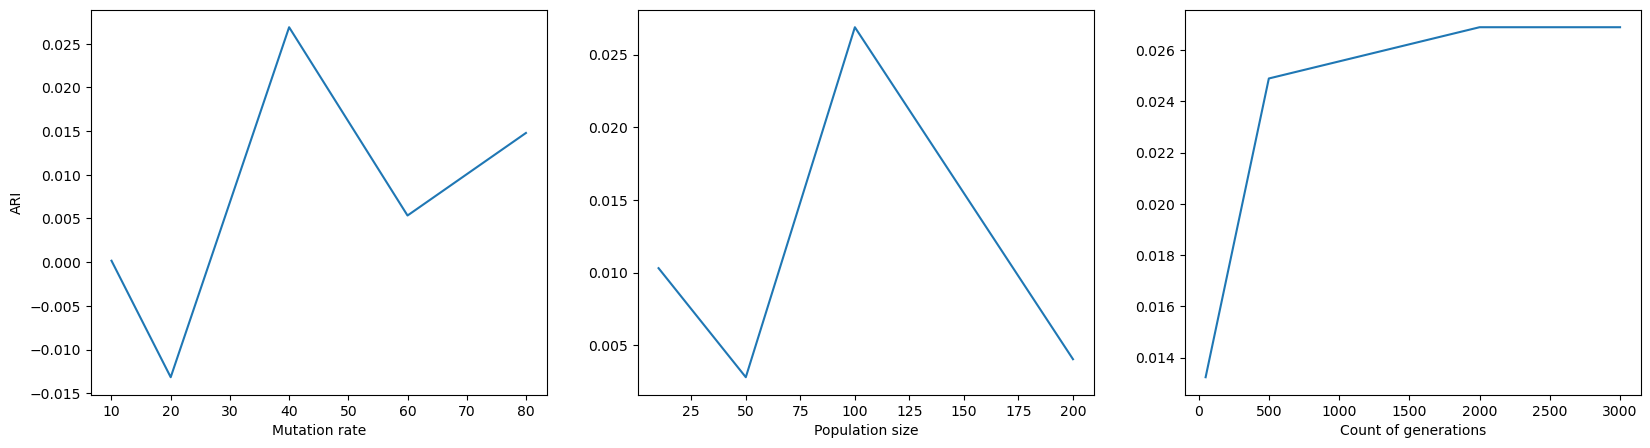

In [73]:
# plot 3 plots in one figure

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].plot(mutation_range, res_mu)

ax[0].set_xlabel('Mutation rate')

ax[0].set_ylabel('ARI')

ax[1].plot(population_range, res_population)

ax[1].set_xlabel('Population size')

ax[2].plot(generation_range, res_generation)

ax[2].set_xlabel('Count of generations')


plt.show()